# Clustering
## Examining the ecological processes influencing the richness of OM assemblages

From data understanding and Exploratory analysis (EDA), it is observed that:
<li>(1) in water dataset, the CFs are distributed across all 97 sites in similar manner e.g. all sites are dominated by lignin class, followed by Tannin, Protein, ConHC etc.</li>
<li>(2) Site clustering based on richness index (Jaccard) followed by analyses on the CFs class distribution reveals similar finding as (1)</li>
<li>(3) During EDA, we encountered a challenge in implementing the original approach e.g for supervised learning such as ANN or RF, we must know the output which is the DOM cluster. However, the goal of ML model is to identify DOM cluster. Considering the dataset that we have, we have implemented a site-clustering based on richness index instead so we are able to examine the ecological process (site metatable) influencing the richness of molecules instead.</li>
    
## Analysis: <a href="https://github.com/mmlchang/WHONDRS_collaboration/blob/master/EDA/site_cluster_class.xlsx">CFs class distribution by sites</a>

#### Example: Water dataset
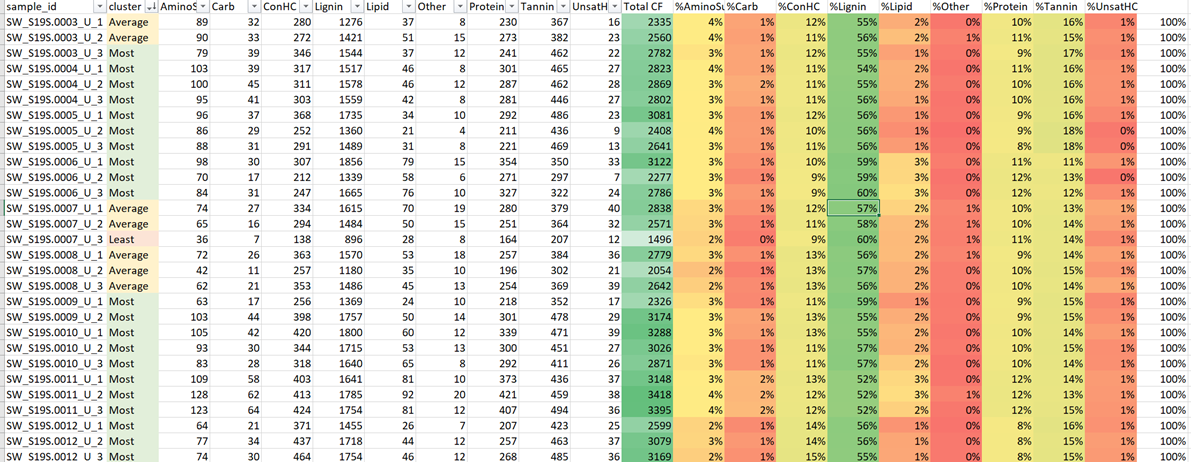

## Final Approach
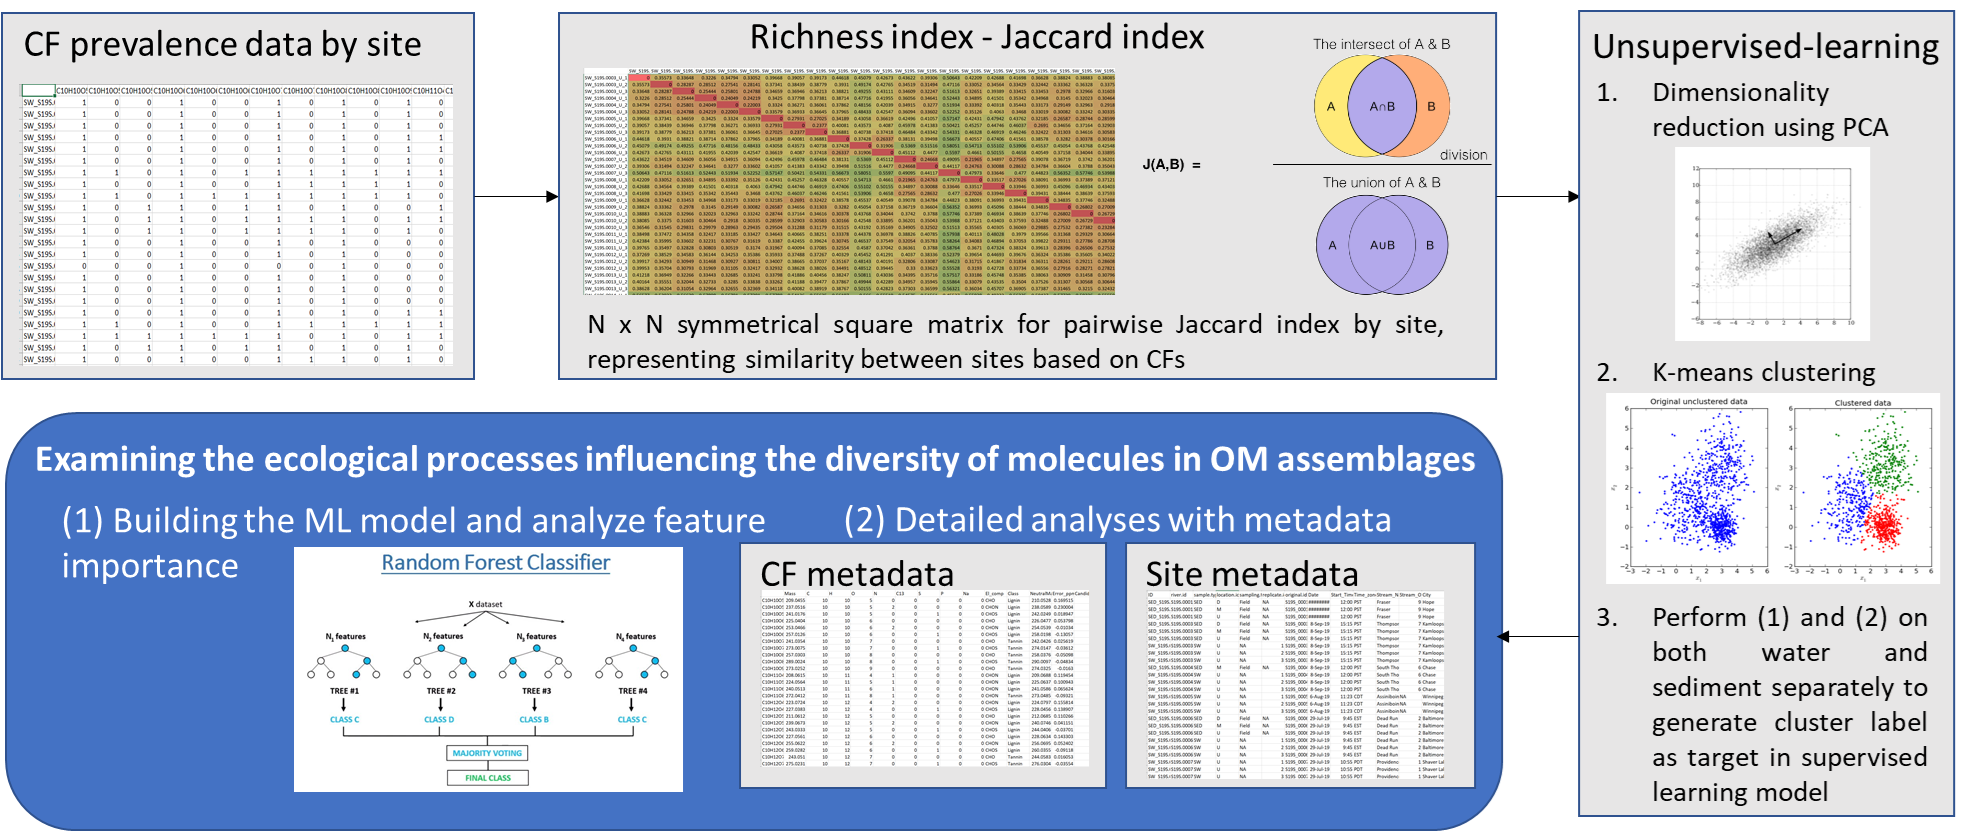

This notebook includes the unsupervised-learning steps for sediment in the third grey box only. The analyses and ML model are implemented next in the other notebooks.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA and k-means
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

## Data Loading

In [2]:
# Load dataset
jaccard_water_fn = '../Dataset/indices/Water_Prevalence_10__commat_2021-09-29_Jaccard.csv'
jaccard_sediment_fn = '../Dataset/indices/Sediment_Prevalence_10__commat_2021-09-29_Jaccard.csv'

df_water = pd.read_csv(jaccard_water_fn)
df_sed = pd.read_csv(jaccard_sediment_fn)
print('Water: ' + str(df_water.shape))
print(df_water.columns.nunique())
print('Sediment: ' + str(df_sed.shape))
print(df_sed.columns.nunique())

# Check if there is any identical columns / CF across all samples
print("Duplicated column in water: " + str(df_water.columns.duplicated().any()))
print("Duplicated column in sediment: " + str(df_sed.columns.duplicated().any()))

# Pre-processing
df_water = df_water.rename(columns={'Unnamed: 0': 'sample_id'})
df_water = df_water.set_index('sample_id')
df_sed = df_sed.rename(columns={'Unnamed: 0': 'sample_id'})
df_sed = df_sed.set_index('sample_id')

Water: (265, 266)
266
Sediment: (239, 240)
240
Duplicated column in water: False
Duplicated column in sediment: False


## Clustering - sediment

In [3]:
# Dataframe for clustering - sediment
sed = df_sed.copy()
print("Shape of sediment:" + str(sed.shape))
sed.head()

Shape of sediment:(239, 239)


,SED_S19S.0001_D_Field,SED_S19S.0001_M_Field,SED_S19S.0001_U_Field,SED_S19S.0003_D_Field,SED_S19S.0003_M_Field,SED_S19S.0003_U_Field,SED_S19S.0004_M_Field,SED_S19S.0006_D_Field,SED_S19S.0006_M_Field,SED_S19S.0006_U_Field,...,SED_S19S.0096_M_Field,SED_S19S.0097_D_Field,SED_S19S.0097_M_Field,SED_S19S.0097_U_Field,SED_S19S.0099_D_Field,SED_S19S.0099_M_Field,SED_S19S.0099_U_Field,SED_S19S.0100_D_Field,SED_S19S.0100_M_Field,SED_S19S.0100_U_Field
sample_id,,,,,,,,,,,,,,,,,,,,,
SED_S19S.0001_D_Field,0.000000,0.211596,0.261504,0.444245,0.731050,0.420824,0.419164,0.437434,0.444566,0.395987,...,0.599353,0.549861,0.502005,0.530204,0.477419,0.522046,0.418273,0.412899,0.410158,0.338380
SED_S19S.0001_M_Field,0.211596,0.000000,0.267857,0.453057,0.736220,0.431911,0.440042,0.447660,0.448379,0.407846,...,0.608981,0.567054,0.514043,0.539405,0.494521,0.533901,0.431769,0.426648,0.429428,0.335968
SED_S19S.0001_U_Field,0.261504,0.267857,0.000000,0.460282,0.708108,0.440923,0.408059,0.441587,0.442654,0.408777,...,0.572034,0.540640,0.493077,0.512980,0.474414,0.486486,0.415172,0.423482,0.416606,0.355249
SED_S19S.0003_D_Field,0.444245,0.453057,0.460282,0.000000,0.641921,0.390076,0.508863,0.530993,0.514059,0.471363,...,0.619976,0.552215,0.471634,0.509516,0.590378,0.596972,0.543333,0.450385,0.517975,0.459292
SED_S19S.0003_M_Field,0.731050,0.736220,0.708108,0.641921,0.000000,0.681196,0.643278,0.737784,0.688437,0.721131,...,0.595593,0.620126,0.615841,0.634857,0.675068,0.673336,0.693767,0.696904,0.696087,0.739992


#### PCA on the feature (Jaccard index)

Text(0, 0.5, 'Cumulative explained variance')

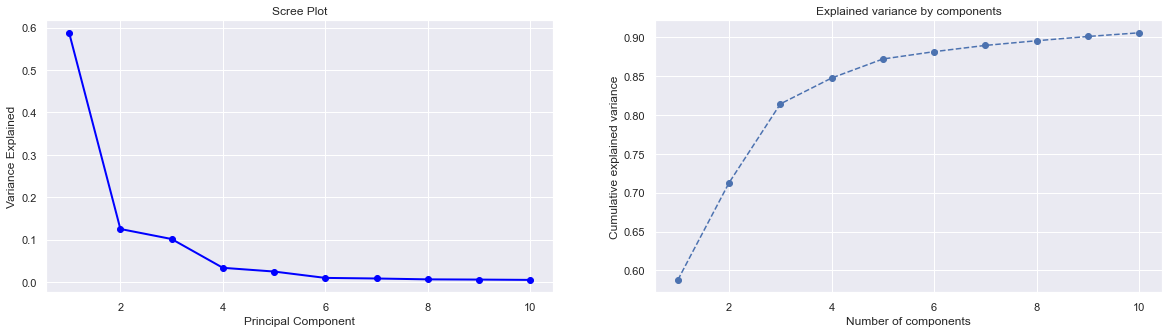

In [4]:
# Dimensionality reduction
n = 10

#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(sed)

PC_values = np.arange(pca.n_components_) + 1
f, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
axs[0].title.set_text('Scree Plot')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Variance Explained')
axs[1].plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
axs[1].title.set_text('Explained variance by components')
axs[1].set_xlabel('Number of components')
axs[1].set_ylabel('Cumulative explained variance')

#### k-means clustering

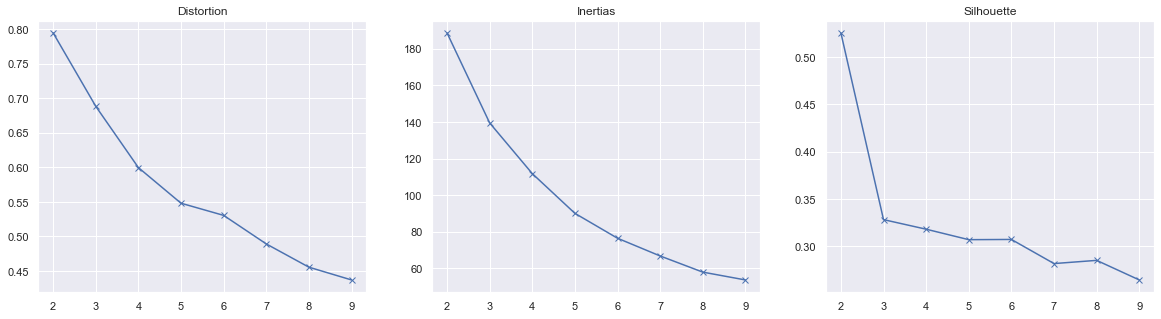

In [5]:
# Select npc PCs based on scree plot
npc = 4

# PCA
pca = PCA(n_components=npc)
pca_fit = pca.fit(sed)
X = pca.transform(sed)

# Select the best k
distortions = []
inertias = []
sil = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    sil.append(silhouette_score(X, kmeanModel.labels_, metric = 'euclidean'))
    
f, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].plot(K, distortions, 'bx-')
axs[0].title.set_text('Distortion')
axs[1].plot(K, inertias, 'bx-')
axs[1].title.set_text('Inertias')
axs[2].plot(K, sil, 'bx-')
axs[2].title.set_text('Silhouette')

Silhouette score: 0.3279667337070889


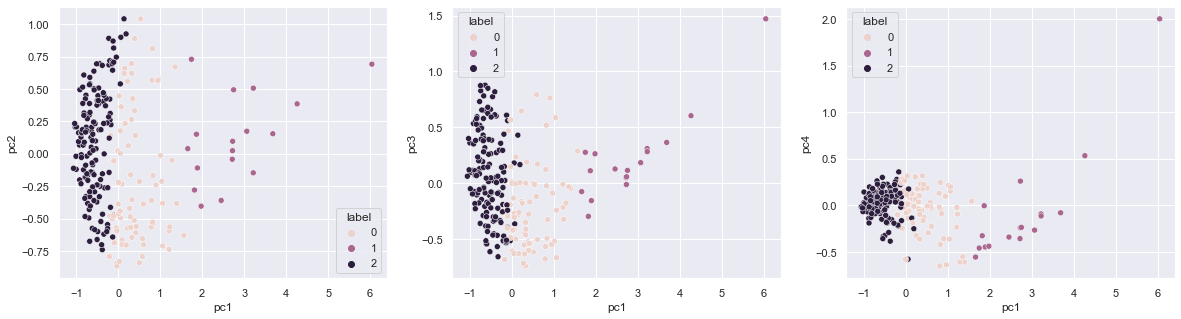

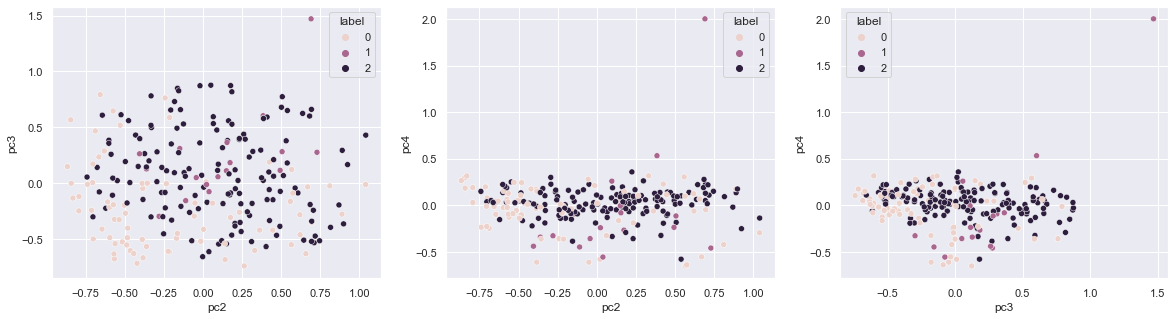

In [6]:
# Based on the plots decide k = 3
k = 3

kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
kmeanModel.fit(X)
distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
inertias.append(kmeanModel.inertia_)

print('Silhouette score: ' + str(metrics.silhouette_score(X, kmeanModel.labels_, metric='euclidean')))

# Visualise
sed_pca_kmeans = pd.concat([sed.reset_index(), pd.DataFrame(X)], axis=1)
sed_pca_kmeans.columns.values[-npc:] = ['pc1','pc2','pc3','pc4'] 
sed_pca_kmeans['label'] = kmeanModel.labels_

# Plots
f, axs = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(sed_pca_kmeans['pc1'], sed_pca_kmeans['pc2'], hue = sed_pca_kmeans['label'], ax=axs[0])
sns.scatterplot(sed_pca_kmeans['pc1'], sed_pca_kmeans['pc3'], hue = sed_pca_kmeans['label'], ax=axs[1])
sns.scatterplot(sed_pca_kmeans['pc1'], sed_pca_kmeans['pc4'], hue = sed_pca_kmeans['label'], ax=axs[2])
plt.show()

f, axs = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(sed_pca_kmeans['pc2'], sed_pca_kmeans['pc3'], hue = sed_pca_kmeans['label'], ax=axs[0])
sns.scatterplot(sed_pca_kmeans['pc2'], sed_pca_kmeans['pc4'], hue = sed_pca_kmeans['label'], ax=axs[1])
sns.scatterplot(sed_pca_kmeans['pc3'], sed_pca_kmeans['pc4'], hue = sed_pca_kmeans['label'], ax=axs[2])
plt.show()

In [7]:
# Sites per cluster
results = sed.copy()
results['label'] = kmeanModel.labels_
print('Site per cluster:')
print(results['label'].value_counts())

# Get CF
sed_cf_fn = '../Dataset/Sediment_Prevalence_10__commat_2021-09-29.csv'
sed = pd.read_csv(sed_cf_fn).rename(columns={'Unnamed: 0': 'sample_id'})
sed = sed.set_index('sample_id')
sed['cluster'] = results['label']
sed.tail()

# Presence of CF per cluster
print('Presence of CF per cluster:')
sed.groupby('cluster').any().sum(axis=1)

Site per cluster:
2    146
0     76
1     17
Name: label, dtype: int64
Presence of CF per cluster:


cluster
0    4051
1    2841
2    4052
dtype: int64

(34, 4)
(20, 4)
(24, 4)
Top unique CFs:(78, 4)


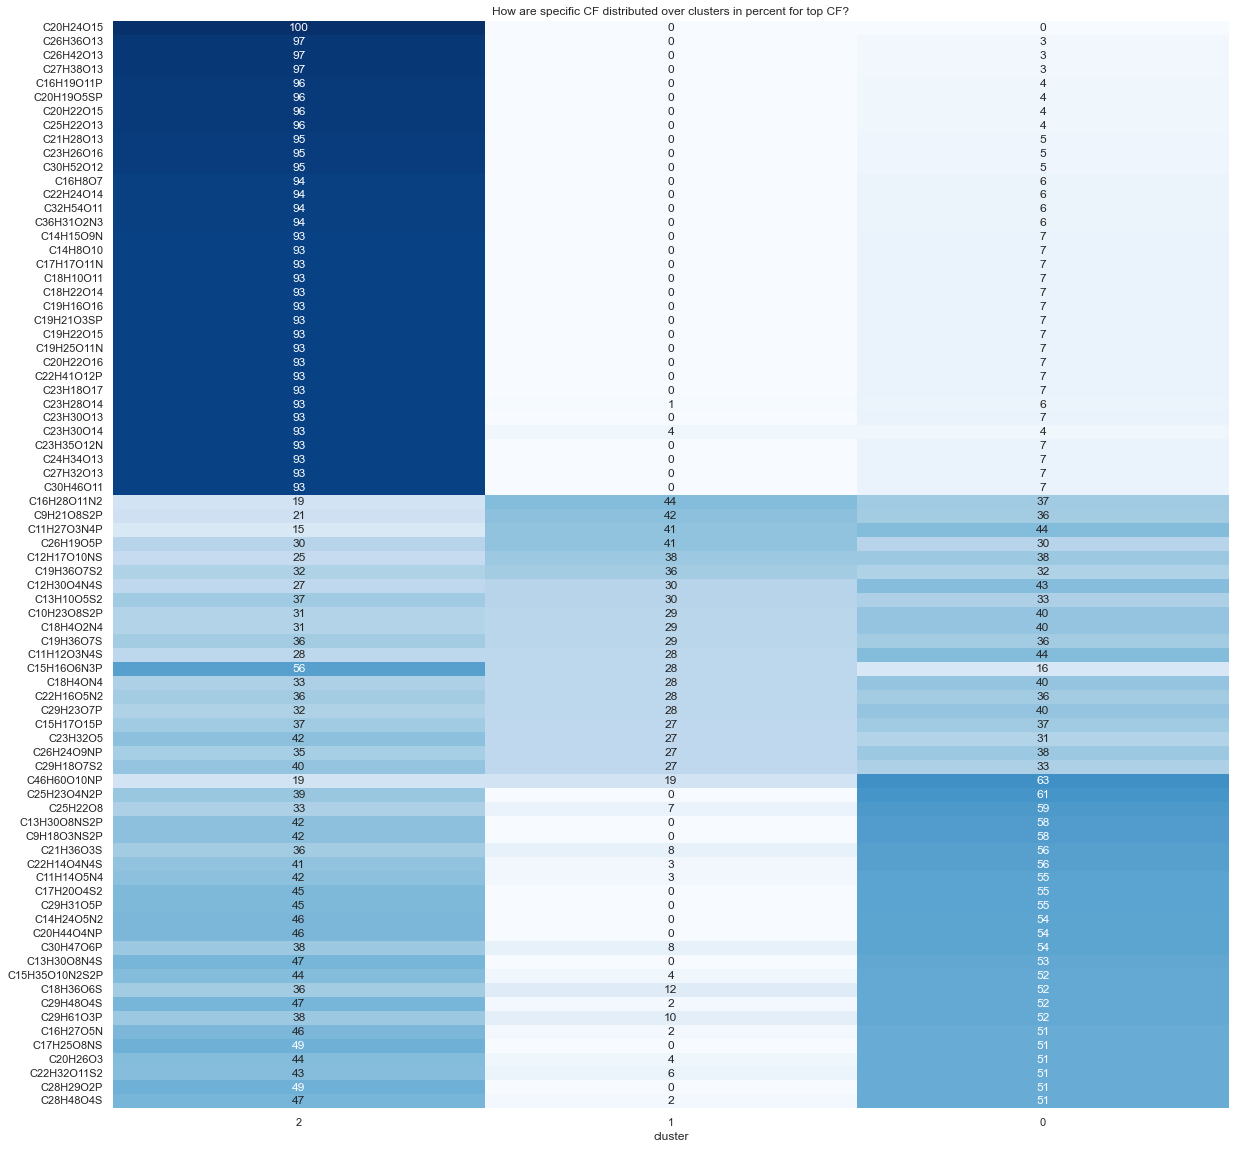

In [8]:
## Top N CFs in each cluster
N = 20

grouped_targets = sed.groupby('cluster').sum() / sed.drop('cluster', axis=1).sum(axis=0) * 100
grouped_targets = grouped_targets.apply(np.round).astype(np.int32)

colname = sed['cluster'].unique()
top_cf = pd.DataFrame()

for i in colname:
    temp = grouped_targets.T.nlargest(N, i, keep='all')
    temp['label'] = i
    print(temp.shape)
    top_cf = top_cf.append(temp)
    
#print(top_cf.shape)
top_cf = top_cf[~top_cf.index.duplicated(keep=False)]
print('Top unique CFs:' + str(top_cf.shape))

plt.figure(figsize = (20,20))
sns.heatmap(top_cf[colname], cmap="Blues", annot=True, fmt="g", cbar=False);
plt.title("How are specific CF distributed over clusters in percent for top CF?");

#### Check Class of CFs by cluster

In [9]:
crosstab = pd.read_csv('../Dataset/Sediment_Prevalence_10_crosstable_2021-09-29.csv')
crosstab = crosstab.rename(columns={'Unnamed: 0': 'cluster'}).set_index('cluster')

colname = ['El_comp','Class']
top_cf = top_cf.join(crosstab[colname])

In [10]:
# Calculate the class of top CFs by cluster
pd.crosstab(top_cf['label'], top_cf['El_comp']) #.apply(lambda r: r/r.sum(), axis=0)

El_comp,CHO,CHON,CHONP,CHONS,CHONSP,CHOP,CHOS,CHOSP
label,,,,,,,,
0,2,3,3,3,3,4,6,0
1,1,4,3,3,0,3,4,2
2,25,5,0,0,0,2,0,2


In [11]:
# Calculate the comp of top CFs by cluster
pd.crosstab(top_cf['label'], top_cf['Class']) #.apply(lambda r: r/r.sum(), axis=0)

Class,AminoSugar,ConHC,Lignin,Lipid,Other,Protein,Tannin,UnsatHC
label,,,,,,,,
0,0,1,9,6,3,4,0,1
1,1,7,4,1,3,2,2,0
2,0,4,15,0,0,6,8,1


#### Diversity indices

<AxesSubplot:xlabel='cluster', ylabel='simpson'>

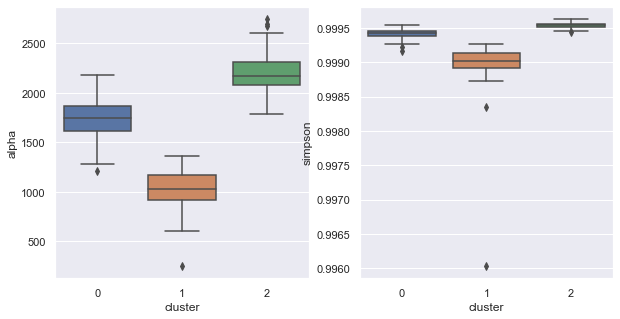

In [12]:
di = pd.read_csv('../Dataset/sediment_merged_indices.csv')
di.rename(columns = {'Unnamed: 0':'sample_id','Sorensen':'sorensen','Richness observed':'alpha', 
                     'Simpson\'s Diversity Index':'simpson'}, inplace = True)
di = di.set_index('sample_id')
di = di[['alpha','simpson']]
df = sed[['cluster']].join(di,how='left')

# Relationship between indices and cluster (numerical vs categorical)
sns.set(rc={'figure.figsize':(10,5)})
f,(ax1,ax2) = plt.subplots(1,2)

sns.boxplot(x='cluster', y='alpha', data=df, orient='v',ax=ax1)
sns.boxplot(x='cluster', y='simpson', data=df, orient='v',ax=ax2)

## All sites with cluster labels for further analyses

In [13]:
sed['cluster'].head()

sample_id
SED_S19S.0001_D_Field    2
SED_S19S.0001_M_Field    2
SED_S19S.0001_U_Field    2
SED_S19S.0003_D_Field    2
SED_S19S.0003_M_Field    1
Name: cluster, dtype: int32

In [14]:
sed['cluster'] = sed['cluster'].apply(lambda x: "{}{}".format('sed_', x))
sed['cluster'].to_csv('sediment_cluster_label.csv')